# Simple Linear Regression
- Pada analisa ini menggunakan sebuah dataset yang memiliki 2 features, yaitu **YearsExperience** dan **Salary** dari sebuah pekerjaan
- **Tujuan** dari analisa ini adalah **memprediksi Salary** jika seseorang yang akan melamar pekerjaan memiliki YearsExperince 5, 1, dan 10
- **Hipotesis awal** : Seseorang yang memiliki YearExperience lebih lama pada suatu pekerjaan memiliki Salary yang besar jika dibandingkan dengan yang YearExperience yang singkat

## LOAD LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## LOAD DATASET

In [5]:
#Nama dataframe kita adalah df yang berisi data dari Salary.csv
#Hanya menggunakan kolom YearsExperience dan Salary
df = pd.read_csv('drive/My Drive/Salary.csv', usecols=['YearsExperience', 'Salary'])

## SNEAK PEAK DATA

In [6]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah YearsExperience
#Dependent variabel(y) adalah Salary
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 2 kolom dengan 35 baris
df.shape

(35, 2)

In [8]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [9]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


## HANDLING MISSING VALUE

In [10]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

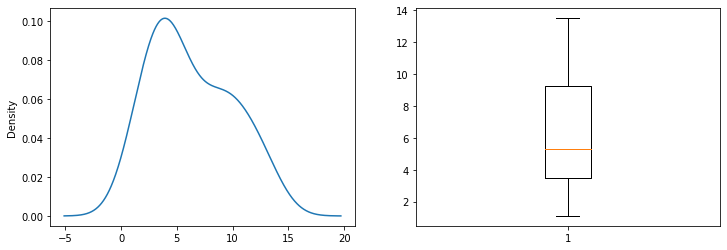

In [11]:
#Univariate analysis YearsExperience
#Melihat distribusi dari YearsExperience
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['YearsExperience'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['YearsExperience'])
plt.show()

- Dapat dilihat bahwa density dari YearsExperience paling tinggi di nilai 5.
- Distribusinya normal dan tidak ada outlier data.

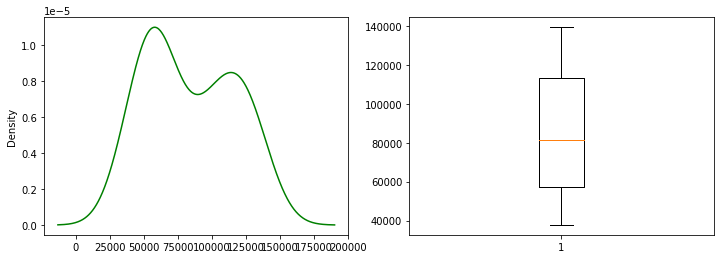

In [13]:
#Univariate analysis Salary
#Melihat distribusi dari Salary
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Salary'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Salary'])
plt.show()

- Density dari price paling tinggi di nilai 50000.
- Distribusinya normal dan tidak ada outlier

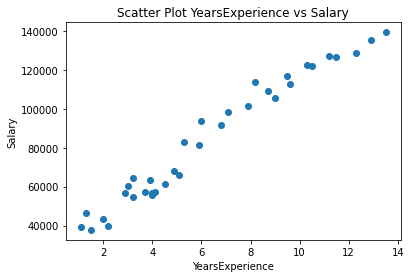

In [14]:
#Bivariate analysis YearsExperience dan Salary
#Menggunakan scatter plot
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter Plot YearsExperience vs Salary')
plt.show()

- Dari scatter plot dapat dilihat bahwa data memiliki korelasi positif yang cukup signifikan.
- Hal ini berarti dengan bertambahnya nilai dari YearsExperience maka nilai Salary pun akan bertambah

In [15]:
#Mengetahui nilai korelasi dari horsepower dan price
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


Setelah kita tahu tentang karakteristik data kita, bisa dilanjutkan ke tahap modelling

## MODELLING

In [16]:
#Recall data kita
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [17]:
#Pertama, buat variabel x dan y
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [18]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [19]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [20]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[8787.19193205]]
[28476.03993293]


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi: Y = 8787,19x + 28476,03

In [22]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.9506069687838575

- model mendapatkan nilai akurasi sebesar 95%

Text(0.5, 1.0, 'YearsExperience vs Salary')

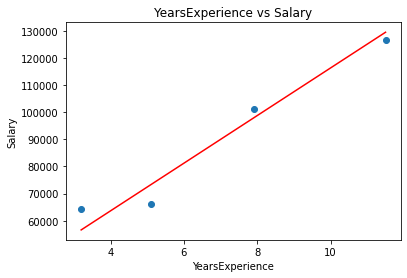

In [25]:
#Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')

# PREDICTION

 - prediksi Salary seseorang ketika memiliki YearsExperience 5, 1 , dan 10

In [26]:
#Prediksi Salary seseorang ketika memiliki YearsExperience 5
lin_reg.predict([[5]])

array([[72411.99959319]])

In [27]:
#Prediksi Salary seseorang ketika memiliki YearsExperience 1
lin_reg.predict([[1]])

array([[37263.23186498]])

In [28]:
# Salary seseorang ketika memiliki YearsExperience 10
lin_reg.predict([[10]])

array([[116347.95925345]])

# KESIMPULAN

- Dengan melihat prediksi Salary diatas, didapatkan bahwa hipotesis awal kita memang benar yaitu seseorang yang memiliki YearsExperience lama disuatu pekerjaan cenderung memiliki Salary yang besar dibandingkan dengan seseorang yang memiliki YearsExperinece yang sedikit